In [1]:
# Importing Libarries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('original.csv')

In [3]:
data.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [4]:
data.tail()

,clientid,income,age,loan,default
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


In [5]:
data.shape

(2000, 5)

In [6]:
data['default'].value_counts()

default
0    1717
1     283
Name: count, dtype: int64

In [7]:
y=data['default']
x=data.drop(columns=['default','clientid'],axis=1)

In [8]:
x

,income,age,loan
0,66155.925095,59.017015,8106.532131
1,34415.153966,48.117153,6564.745018
2,57317.170063,63.108049,8020.953296
3,42709.534201,45.751972,6103.642260
4,66952.688845,18.584336,8770.099235
...,...,...,...
1995,59221.044874,48.518179,1926.729397
1996,69516.127573,23.162104,3503.176156
1997,44311.449262,28.017167,5522.786693
1998,43756.056605,63.971796,1622.722598


In [9]:
y

0       0
1       0
2       0
3       0
4       1
       ..
1995    0
1996    0
1997    1
1998    0
1999    0
Name: default, Length: 2000, dtype: int64

In [10]:
x.isnull().sum()

income    0
age       3
loan      0
dtype: int64

In [11]:
x['age'].fillna(x['age'].mean(),inplace=True)

C:\Users\Yash Singh\AppData\Local\Temp\ipykernel_8004\4237722257.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x['age'].fillna(x['age'].mean(),inplace=True)


In [12]:
x.isnull().sum()

income    0
age       0
loan      0
dtype: int64

# Under Sampling

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
Dtree=DecisionTreeClassifier()

In [15]:
Dtree.fit(x,y)

DecisionTreeClassifier()

In [16]:
x.value_counts()

income        age        loan       
20014.489470  43.202204  2426.306223    1
53601.812436  20.240621  9601.375482    1
53825.536736  49.713904  5272.804792    1
53825.430577  45.356690  431.450161     1
53812.226483  44.919152  3245.041667    1
                                       ..
36840.603657  36.674583  6557.940331    1
36837.530851  54.728504  1598.183569    1
36801.907180  43.027943  5406.344926    1
36727.745999  58.184654  7287.540764    1
69995.685578  52.719673  2084.370861    1
Name: count, Length: 2000, dtype: int64

In [17]:
y.value_counts()

default
0    1717
1     283
Name: count, dtype: int64

Text(0, 0.5, 'frequency')

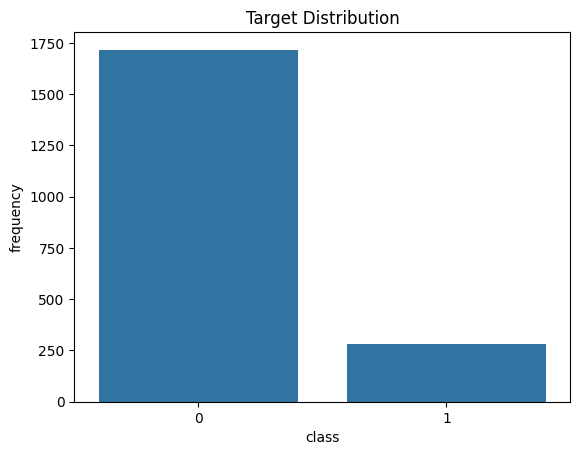

In [18]:
sns.countplot(x=y,data=data)
plt.title('Target Distribution')
plt.xlabel('class')
plt.ylabel('frequency')

In [19]:
pip install imblearn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   ---------- ---------------------------- 71.7/258.3 kB 991.0 kB/s eta 0:00:01
   ----------------------- ---------------- 153.6/258.3 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
from imblearn.under_sampling import RandomUnderSampler

In [21]:
us=RandomUnderSampler(random_state=0)

In [22]:
x_res,y_res=us.fit_resample(x,y)

In [23]:
x_res

,income,age,loan
1347,66078.769350,45.536325,3664.621452
8,40654.892537,55.496853,4755.825280
869,65000.819617,21.699700,1114.914824
1542,37895.181733,54.515149,6071.340205
561,53033.864130,38.457560,10427.470503
...,...,...,...
1964,22800.796775,28.198257,3740.900936
1966,21982.017374,34.915516,4265.173704
1983,64466.760138,33.327144,8537.369666
1989,43662.092688,25.252609,7269.596897


In [24]:
y_res.value_counts()

default
0    283
1    283
Name: count, dtype: int64

Text(0, 0.5, 'frequency')

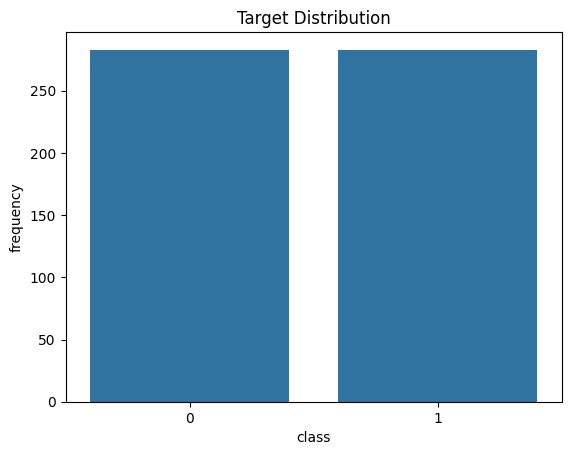

In [25]:
sns.countplot(x=y_res,data=data)
plt.title('Target Distribution')
plt.xlabel('class')
plt.ylabel('frequency')

# Oversampling

In [26]:
from imblearn.over_sampling import RandomOverSampler

In [27]:
os=RandomOverSampler(random_state=0)

In [28]:
x_res2,y_res2=os.fit_resample(x,y)

In [29]:
y_res2.value_counts()

default
0    1717
1    1717
Name: count, dtype: int64

Text(0, 0.5, 'frequency')

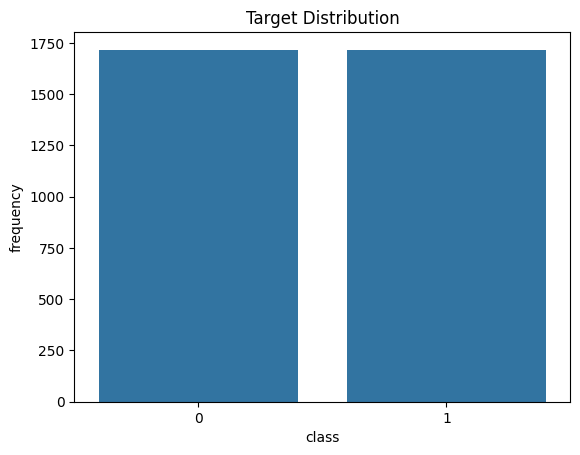

In [30]:
sns.countplot(x=y_res2,data=data)
plt.title('Target Distribution')
plt.xlabel('class')
plt.ylabel('frequency')

In [31]:
p=Dtree.predict(x_res2)

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(p,y_res2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1717
           1       1.00      1.00      1.00      1717

    accuracy                           1.00      3434
   macro avg       1.00      1.00      1.00      3434
weighted avg       1.00      1.00      1.00      3434



# SMOTE

In [34]:
data=pd.read_csv('original.csv')

In [35]:
data.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [36]:
y=data['default']
x=data.drop(columns=['default','clientid'],axis=1)

In [37]:
x['age'].fillna(x['age'].mean(),inplace=True)

C:\Users\Yash Singh\AppData\Local\Temp\ipykernel_8004\4237722257.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x['age'].fillna(x['age'].mean(),inplace=True)


In [38]:
x.shape


(2000, 3)

In [39]:
y.value_counts()

default
0    1717
1     283
Name: count, dtype: int64

In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
smote=SMOTE()

In [42]:
x_res2,y_res2=smote.fit_resample(x,y)

In [43]:
print(y.value_counts())
print(y_res2.value_counts())

default
0    1717
1     283
Name: count, dtype: int64
default
0    1717
1    1717
Name: count, dtype: int64


In [44]:
p=Dtree.predict(x_res2)

In [45]:
print(classification_report(p,y_res2))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1727
           1       0.99      1.00      1.00      1707

    accuracy                           1.00      3434
   macro avg       1.00      1.00      1.00      3434
weighted avg       1.00      1.00      1.00      3434

